In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
csv = pd.read_csv("titanic.csv")
csv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'Fare')

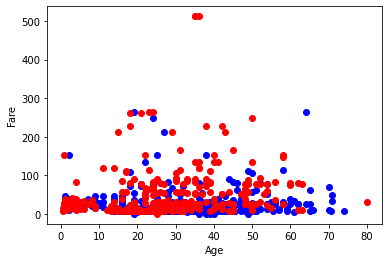

In [7]:

df = csv[csv.Survived==0]
df1= csv[csv.Survived==1]
plt.scatter(df.Age,df.Fare,color = "blue")
plt.scatter(df1.Age,df1.Fare,color = "red")
plt.xlabel("Age")
plt.ylabel("Fare")

In [8]:
from sklearn.preprocessing import LabelEncoder

In [45]:
X = csv[["Pclass",'Age','SibSp','Parch','Fare','Sex']]
le = LabelEncoder()
csv.Sex=le.fit_transform(csv.Sex)
Y = csv.Survived

csv.Sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33)

X_train.Age = X_train.Age.fillna(X_train.Age.mean())
X_test.Age =  X_test.Age.fillna(X_test.Age.mean())

c:\users\jaideep m\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
from sklearn.linear_model import LogisticRegression

In [46]:
LR = LogisticRegression()
LR.fit(X_train,y_train)


c:\users\jaideep m\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
LR.predict(X_test)
LR.score(X_train,y_train)

1.0

In [ ]:
plt.plot(X_train,LR.predict(X_train))

In [16]:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [48]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.predict(X_train)
model.score(X_train,y_train)

In [ ]:
plt.plot(X_train,model.predict(X_train))

In [19]:
from sklearn.datasets import  load_iris

In [20]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [21]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
df = pd.DataFrame(iris.data,columns=iris.feature_names )
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
df["target"]= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
df["target_names"] = df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [25]:
X = df.drop(['target','target_names'],axis= 1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y = df.target

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size= 0.10)

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
svc.score(X_train,y_train)

0.9703703703703703

In [32]:
from sklearn.datasets import load_digits

In [33]:
digits = load_digits()

In [34]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

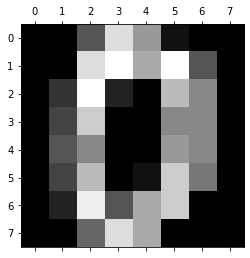

In [35]:
plt.gray()
plt.matshow(digits.images[0])

In [36]:
dff = pd.DataFrame(digits.data)
dff["Target"]=digits.target
dff

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [56]:
X = dff.drop(['Target'],axis=1)
y= dff.Target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: Target, Length: 1797, dtype: int32

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.3)


In [39]:
def get_score(model,X_train,y_train):
    model.fit(X_train,y_train)
    return model.score(X_train,y_train)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.svm import SVC
Svm = SVC()
from sklearn.ensemble import RandomForestClassifier
Rm = RandomForestClassifier()
from sklearn import tree
DC = tree.DecisionTreeClassifier()

In [64]:
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits=3)

In [69]:
for train_index,test_index in sk.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index],digits.data[test_index],digits.target[train_index],\
                                        digits.target[train_index]
    print(get_score(Svm,X_train,y_train))

0.9974958263772955
0.9958263772954925
0.996661101836394


In [74]:
from sklearn.model_selection import  cross_val_score
cross_val_score(Rm,digits.data,digits.target,cv = 10)

array([0.91111111, 0.96666667, 0.94444444, 0.93888889, 0.95555556,
       0.97222222, 0.97222222, 0.97765363, 0.93296089, 0.9273743 ])

In [163]:
dff= pd.read_csv("casual questions.csv")
dff


,questions,target
0,"""what is your name""","""my name is jarvice"""
1,"""what would be your name""","""my name is jarvice"""
2,"""how are you""","""I?m fine"
3,"""I love you""","""thank you"""
4,"""I want to love you""","""thank you"""
5,"""you are the love of my life""","""thank you"""
6,"""thank you""","""you welcome"""
7,"""sorrry""","""you welcome"""
8,"""I like you""","""you welcome"""
9,"""today is a good day""","""yes it is"


In [164]:
X = dff.questions
y= dff.target

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_tarin,y_test= train_test_split(X,y,test_size = 0.01)
X_test


7    "sorrry"
Name: questions, dtype: object

In [167]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x=cv.fit_transform(X_train.values)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]], dtype=int64)

In [168]:
from sklearn.naive_bayes import MultinomialNB

In [169]:
nv = MultinomialNB()
nv.fit(x,y_tarin)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [176]:
ques = ["hai thgis is jaideep"]
ques_count = cv.transform(ques)
y_pedicter=nv.predict(ques_count)
nv.score(ques_count,y_pedicter)
nv.predict_proba(ques_count)

array([[0.02540953, 0.05994623, 0.30169123, 0.07992831, 0.05182793,
        0.16108638, 0.22266308, 0.04872366, 0.04872366]])

In [180]:
ans = le.inverse_transform(y_pedicter)
ans[0]

'"giberish"'